## Теперь о монетизации - Sleepy работает по подписке: 990 рублей в месяц. Первые две недели бесплатно, затем клиент видит пейвол (от «pay wall» - как бы стена, которая тебя не пускает дальше, пока ты не оплатишь) и, если привязывает карту, продолжает пользоваться подпиской, а деньги списываются автоматически.

## Если говорить о привлечении, то это молодой венчурный стартап, поэтому привлечение одного пользователя (даже если он не заплатит) довольно дорогое - 500 рублей.

## Данных у вас немного - вам дан датасет всего из двух полей:


## user - номер пользователя в системе

## dt - дата его захода в приложение

## Данные устроены таким образом, что фиксируется только один заход пользователя за день - одинаковых пар "пользователь - дата" быть не может. 
## Кроме того, фиксируются только заходы пользователей на триальной версии и тех, кто прошел пейвол. 
## Если человек открыл приложение после 14 дня и не привязал карту - такой заход не фиксируется.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# n day retention


# WIN
users_sleepy = pd.read_csv(r'C:\Users\Incognitus\Downloads\entries.csv', sep=';') 
# MAC
# users_sleepy = pd.read_csv(r'/Users/vladislavlipkin/Downloads/entries.csv', sep=';') 

In [3]:
users_sleepy.head(5)

,user,dt,Unnamed: 2
0,0,12.11.2023,NaN
1,0,13.11.2023,NaN
2,0,14.11.2023,NaN
3,0,16.11.2023,NaN
4,0,17.11.2023,NaN


In [21]:
# --- подготовка данных ---
users_filter = users_sleepy.loc[:, ['user', 'dt']]
users_filter['dt'] = pd.to_datetime(users_filter['dt'], format='%d.%m.%Y')
users_filter['month_start'] = users_filter['dt'].dt.to_period('M').dt.to_timestamp()
users_filter['dt_reg'] = users_filter.groupby('user')['dt'].transform('min')
users_filter['diff'] = (users_filter['dt'] - users_filter['dt_reg']).dt.days
users_filter['week'] = round(users_filter['diff'] / 7, 0)
users_filter['month'] = round(users_filter['diff'] / 30, 0)


# --- считаем общее количество пользователей ---
all_users = users_filter['user'].nunique()

# --- retention по разным периодам ---
users_filter['N_DAY_retention']   = users_filter.groupby('diff')['user'].transform('nunique') / all_users * 100
users_filter['N_WEEK_retention']  = users_filter.groupby('week')['user'].transform('nunique') / all_users * 100
users_filter['N_MONTH_retention'] = users_filter.groupby('month')['user'].transform('nunique') / all_users * 100


# 🔹🔹🔹 Универсальная переменная для переключения периода 🔹🔹🔹
period = 'day'     # варианты: 'day', 'week', 'month'


# --- выбираем колонку и подписи в зависимости от периода ---
if period == 'day':
    idx_col = 'diff'
    period_name = 'Day'
elif period == 'week':
    idx_col = 'week'
    period_name = 'Week'
elif period == 'month':
    idx_col = 'month'
    period_name = 'Month'
else:
    raise ValueError("period must be 'day', 'week', or 'month'")


# --- создаем универсальный pivot ---
pivot = (
    users_filter
    .groupby(idx_col, as_index=False)['user']
    .nunique()
    .rename(columns={'user': 'unique_users'})
)

pivot['retention'] = pivot['unique_users'] / all_users * 100
pivot['period'] = period_name  # добавляем столбец для понятного вывода

# --- создаем полный диапазон индексов ---
full_range = pd.DataFrame({idx_col: range(int(pivot[idx_col].min()), int(pivot[idx_col].max()) + 1)})
pivot_full = full_range.merge(pivot, on=idx_col, how='left')

# --- вывод ---
print(f"Retention by {period_name}")
display(pivot_full.head(20))
print(pivot_full['retention'].sum() / 100)

Retention by Day


,diff,unique_users,retention,period
0,0,2000.0,100.00,Day
1,1,1039.0,51.95,Day
2,2,1052.0,52.60,Day
3,3,1055.0,52.75,Day
4,4,1024.0,51.20,Day
5,5,968.0,48.40,Day
6,6,984.0,49.20,Day
7,7,927.0,46.35,Day
8,8,954.0,47.70,Day
9,9,958.0,47.90,Day


26.162500000000005


In [22]:
users_filter.head(20)

,user,dt,month_start,dt_reg,diff,week,month,N_DAY_retention,N_WEEK_retention,N_MONTH_retention
0,0,2023-11-12,2023-11-01,2023-11-12,0,0.0,0.0,100.00,100.00,100.00
1,0,2023-11-13,2023-11-01,2023-11-12,1,0.0,0.0,51.95,100.00,100.00
2,0,2023-11-14,2023-11-01,2023-11-12,2,0.0,0.0,52.60,100.00,100.00
3,0,2023-11-16,2023-11-01,2023-11-12,4,1.0,0.0,51.20,90.60,100.00
4,0,2023-11-17,2023-11-01,2023-11-12,5,1.0,0.0,48.40,90.60,100.00
5,0,2023-11-18,2023-11-01,2023-11-12,6,1.0,0.0,49.20,90.60,100.00
6,0,2023-11-19,2023-11-01,2023-11-12,7,1.0,0.0,46.35,90.60,100.00
7,0,2023-11-21,2023-11-01,2023-11-12,9,1.0,0.0,47.90,90.60,100.00
8,0,2023-11-22,2023-11-01,2023-11-12,10,1.0,0.0,47.05,90.60,100.00
9,0,2023-11-23,2023-11-01,2023-11-12,11,2.0,0.0,44.85,83.00,100.00


In [5]:
# dau = pivot_full['unique_users'].sum() / len(pivot_full)
mau = users_filter.groupby('moth_start')['unique_users'].sum() / len(pivot_for_MAU)
# print(f'DAU: {dau}')
# print(f'MAU: {mau}')
# print()
# print(
#     f'STICKY_FACTOR: {dau / mau}'
# )

In [28]:
user_in_month = users_filter.groupby('month_start')['user'].nunique().reset_index(name='unique_users')
user_in_month['unique_users'].mean()

458.9655172413793

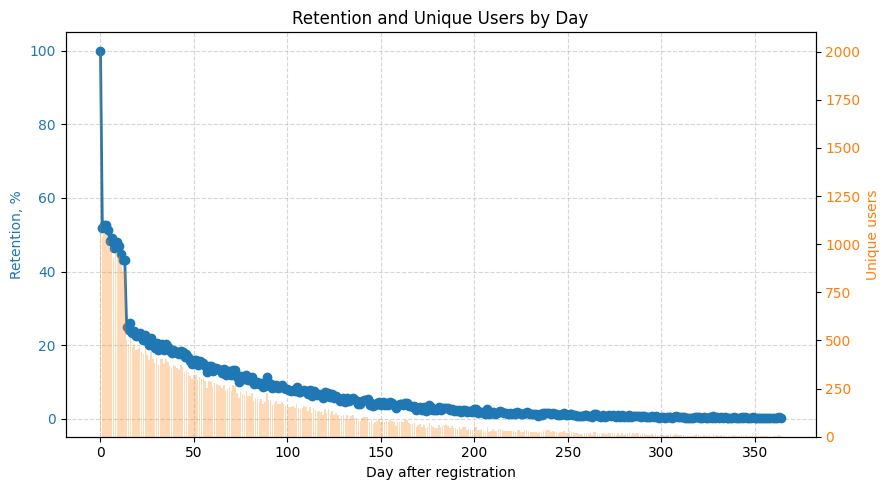

In [6]:

fig, ax1 = plt.subplots(figsize=(9, 5))

# --- Первая ось: Retention ---
color = 'tab:blue'
ax1.set_xlabel(f'{period_name} after registration')
ax1.set_ylabel('Retention, %', color=color)
ax1.plot(pivot_full[idx_col], pivot_full['retention'], color=color, marker='o', linewidth=2, label='Retention %')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='major', axis='both', linestyle='--', alpha=0.5)

# --- Вторая ось: количество уникальных пользователей ---
ax2 = ax1.twinx()  # создаём вторую ось Y
color = 'tab:orange'
ax2.set_ylabel('Unique users', color=color)
ax2.bar(pivot_full[idx_col], pivot_full['unique_users'], color=color, alpha=0.3, label='Unique users')
ax2.tick_params(axis='y', labelcolor=color)

# --- Заголовок и оформление ---
plt.title(f'Retention and Unique Users by {period_name}')
fig.tight_layout()
plt.show()

In [7]:
6 * 990

5940

In [8]:
users_filter

,user,dt,dt_reg,diff,week,month,N_DAY_retention,N_WEEK_retention,N_MONTH_retention
0,0,2023-11-12,2023-11-12,0,0.0,0.0,100.00,100.00,100.00
1,0,2023-11-13,2023-11-12,1,0.0,0.0,51.95,100.00,100.00
2,0,2023-11-14,2023-11-12,2,0.0,0.0,52.60,100.00,100.00
3,0,2023-11-16,2023-11-12,4,1.0,0.0,51.20,90.60,100.00
4,0,2023-11-17,2023-11-12,5,1.0,0.0,48.40,90.60,100.00
...,...,...,...,...,...,...,...,...,...
52320,1998,2023-12-26,2023-07-26,153,22.0,5.0,4.15,24.10,62.40
52321,1998,2024-06-18,2023-07-26,328,47.0,11.0,0.70,2.55,8.25
52322,1999,2023-06-04,2023-06-04,0,0.0,0.0,100.00,100.00,100.00
52323,1999,2023-07-14,2023-06-04,40,6.0,1.0,18.35,66.95,92.50


In [9]:
# users_filter['month'] = round(users_filter['diff'] / 30, 0)
# users_filter['week'] = round(users_filter['diff'] / 7, 0)
users_filter

,user,dt,dt_reg,diff,week,month,N_DAY_retention,N_WEEK_retention,N_MONTH_retention
0,0,2023-11-12,2023-11-12,0,0.0,0.0,100.00,100.00,100.00
1,0,2023-11-13,2023-11-12,1,0.0,0.0,51.95,100.00,100.00
2,0,2023-11-14,2023-11-12,2,0.0,0.0,52.60,100.00,100.00
3,0,2023-11-16,2023-11-12,4,1.0,0.0,51.20,90.60,100.00
4,0,2023-11-17,2023-11-12,5,1.0,0.0,48.40,90.60,100.00
...,...,...,...,...,...,...,...,...,...
52320,1998,2023-12-26,2023-07-26,153,22.0,5.0,4.15,24.10,62.40
52321,1998,2024-06-18,2023-07-26,328,47.0,11.0,0.70,2.55,8.25
52322,1999,2023-06-04,2023-06-04,0,0.0,0.0,100.00,100.00,100.00
52323,1999,2023-07-14,2023-06-04,40,6.0,1.0,18.35,66.95,92.50


In [10]:
print(f'count of month: {users_filter['month'].sum() / 100}')
print(f'count of week: {users_filter['week'].sum() / 100}')

count of month: 1071.64
count of week: 4682.26


In [11]:
# count users paying
cpu = users_filter.query('diff >= 14')['user'].nunique()
print(f'количество людей купивших подписку : {cpu}')
print()
price_all_users = all_users * 500
net_profit = cpu * 990 - price_all_users
print(f'стоимость привлечения за всех пользователей {price_all_users}')
print()
print(f'выручка за все проданные подписки: {cpu * 990}')
print()
print(f'чистая прибыль с учетом затратов: {net_profit}')

количество людей купивших подписку : 1981

стоимость привлечения за всех пользователей 1000000

выручка за все проданные подписки: 1961190

чистая прибыль с учетом затратов: 961190


In [12]:
(full_range / users_filter['user'].nunique())['diff'].sum() / 30

1.1071666666666669

In [13]:
pivot_full['retention'].sum() / 100

26.162500000000005

In [14]:
uniq_users = users_filter.query('14 <= diff <= 16')['user'].nunique()
print(f'количество уникальных пользователей: {uniq_users}')
print(f'выручка: {uniq_users * 990}')

количество уникальных пользователей: 1076
выручка: 1065240


In [15]:
pivot_full.query('diff >= 14').sort_values('retention', ascending=False)

,diff,unique_users,retention,period
16,16,518.0,25.90,Day
14,14,500.0,25.00,Day
15,15,484.0,24.20,Day
18,18,478.0,23.90,Day
17,17,465.0,23.25,Day
...,...,...,...,...
327,327,2.0,0.10,Day
344,344,2.0,0.10,Day
341,341,2.0,0.10,Day
364,364,2.0,0.10,Day


In [16]:
users_filter.query('diff >= 14')['user'].nunique() - 500

1481

In [17]:
pivot_full.query('diff >= 14')

,diff,unique_users,retention,period
14,14,500.0,25.00,Day
15,15,484.0,24.20,Day
16,16,518.0,25.90,Day
17,17,465.0,23.25,Day
18,18,478.0,23.90,Day
...,...,...,...,...
360,360,6.0,0.30,Day
361,361,5.0,0.25,Day
362,362,3.0,0.15,Day
363,363,9.0,0.45,Day
